In [29]:
import random
import os

In [118]:
# , "Муниципальное заведение"
categories = ['Парк', 'Набережная', 'Кафе', 'Развлекательный центр', 'Достопримечательность','Культура','Жилой квартал']
locations = {'Парк':['Динамо', "Комсомольский", "ЦПКиО", "им. Горького", "Дендрарий", "Победы", "Византийский сад", "Райский сад", "Вишневый сад"], 
             'Набережная': ["Масалитинова", "Макарова", "Нижняя", "Верхняя", "Постышева", "Морская", "Черепаховая", "Куликовская"], 
             'Кафе':['Рататуй', "Имбирь", "Ичираку рамен", "Виктория", "Вкус Детства", "Имбирь", "Жадина Говядина", "Байкал", "Сибирь", "Токио","Крастикраб", "Маленькая Италия", "Океан"], 
             'Развлекательный центр':["Карусель", "Боулинг", "Микс", "Мир", "Твикс", "Остров пиратов", "Карибы", "Молл"],
             'Достопримечательность':['Памятник Мстителям', "Арка искусств", "Мемориал пожарным", "Скульптура фонарщика", "Памятник великой черепахе", "Стена хокаге", "Дворец принцессы", 'Домики Шира', "Граффити СоюзМультфильм", "Кошкин дом", "Тролли"],
             'Культура':["Музей сладостей", "Театр аниме", "Кинотеатр Максима", "Драмтеатр", "КинотеатрМолл", "Музей черепах", "Музей истории", "Галлерея кинематографии", "Галерея Детроит", "Музей чипсов", "Музей Мстителей", "Театр Картинки кино", "Галерея"],
             'Жилой квартал':['Жемчужина', 'Стрижи', "Ласточка", "Зверополис", "Домино", "Изумрудный город", "Тридевятое Королевство","Гравити Фолз", "Готэм-Сити", "Спрингфилд",]
            }

In [116]:
def generate_density(cat, district, problem):
    week = ['Понедельник', "Вторник", "Среда","Четверг", "Пятница", "Суббота", "Воскресенье"]
    density = '<div class="chart">\n\
        <b>Посещаемость:</b>\n'
    avg_density=70
    
    models = [True,False]
    model = models[random.randint(0,1)]
    like = random.randint(40, 100)
    
    if district == 1 and cat == 'Развлекательный центр' and not problem:
        model = False
        avg_density=15
        problem=True
        like = random.randint(10, 25)
        
    if district == 2 and cat == 'Парк' and not problem:
        avg_density=20
        problem=True
        like = random.randint(10, 25)
    
    if district == 3 and cat == 'Жилой квартал' and not problem:
        avg_density=20
        problem=True
        like = random.randint(10, 25)
        
    for w in week[:-2]:
        if model:
            #в будни больше
            d = random.randint(int(avg_density/2),avg_density)
            d2 = random.randint(int(avg_density/4),int(avg_density/2))
        else:
            #в выходные больше
            d = random.randint(int(avg_density/4),int(avg_density/2))
            d2 = random.randint(int(avg_density/2),avg_density)
            
        density+='<div><div class="line">'+w+'</div>\n\
            <div class="pipe line">\n\
            <div style="width: '+str(d)+'%"> </div>\n\
            </div></div>\n'
        
    for w in week[-2:]:
        density+='<div><div class="line">'+w+'</div>\n\
            <div class="pipe line">\n\
            <div style="width: '+str(d2)+'%"> </div>\n\
            </div></div>\n'   
        
    return density+'</div>\n', problem, like

In [95]:
def get_negative(category):
    return 'Очень плохо'

def get_positive(category):
    return 'Люблю это место, все понравилось. '+ category+ ' супер!'

def generate_reviews(like, category):
    reviews = '<div class="comments">\n\
    <b>Комментарии:</b>\n\
    <ul class="media-list">\n'
    
    if like>60:
        start = 3
    else:
        start = 1
    
    for i in range(0,3):
        
        rating = random.randint(start,5)
        month = ['января', "февраля", "марта", "апреля", "мая", "июня", "июля", "августа", "сентября", "октября", "ноября", "декабря"]
        date = str(random.randint(1,28))+' '+month[random.randint(0,11)]+' '+str(random.randint(2017, 2020))+', '+str(random.randint(10,23))+':'+str(random.randint(10,59))

        if rating<3:
            review = get_negative(category)
        else:
            review = get_positive(category)
            
        reviews+='<li class="media">\n\
            <div class="media-body">\n\
                <div class="media-heading">\n\
                    <div class="author"><span class="rating">'+str(rating)+'</span><span>⭐</span><span class="devide">|</span></div>\n\
                    <div class="metadata">\n\
                        <span class="date">'+date+'</span>\n\
                    </div>\n\
                </div>\n\
                <p class="review">'+review+'</p>\n\
            </div>\n\
        </li>\n'
    return reviews+'</ul></div>\n'

In [96]:
with open('site/tiles/data.pickle', 'rb') as f:
    places = pickle.load(f)

In [119]:
use_sight = []
close='</div>'
problem = [False, False, False]
for s in range(1,4): 
    html = '<!DOCTYPE html>\n\
    <html>\n\
    <head>\n\
    <title>Места района города Энск</title>\n\
    <meta charset="utf-8"/>\n\
    <meta name="description" content="">\n\
    <meta name="viewport" content="width=device-width">\n\
    <link href="../css/bootstrap.css" rel="stylesheet"/>\n\
    <link href="../css/templatemo-misc.css" rel="stylesheet"/>\n\
    <link href="../css/templatemo-style.css" rel="stylesheet"/>\n\
    <link href="http://fonts.googleapis.com/css?family=Roboto+Slab:400,700,300,100" rel="stylesheet"/>\n\
    <link href="http://fonts.googleapis.com/css?family=Roboto:400,400italic,300italic,300,500,500italic,700,900" rel="stylesheet"/>\n\
    <link rel="stylesheet" href="../css/font-awesome.css">\n\
    <link rel="stylesheet" href="../css/animate.css">\n\
    <script src="../js/vendor/modernizr-2.6.1-respond-1.1.0.min.js"></script>\n\
    </head>\n\
    <body>\n\
    <div class="content-wrapper">\n\
    <div class="inner-container container">\n\
        <div class="row">\n\
            <div class="section-header col-md-12">\n\
                <h2>Дистрикт №'+str(s)+'</h2>\n\
                <span>район города N</span>\n\
            </div>\n\
        </div>\n\
        <div class="project-detail row">\n\
            <div class="project-slider col-md-12">\n\
                <img src="greens/green'+str(s)+'.jpg" alt="Фото с квадрокоптера">\n\
                <img src="maps/map'+str(s)+'.jpg" alt="Карта района">\n\
                <a href="#" class="slidesjs-previous slidesjs-navigation">&lt;</a> \n\
                <a href="#" class="slidesjs-next slidesjs-navigation">&gt;</a>\n\
            </div>\n\
            <div class="project-infos col-md-12">\n\
                <div class="box-content">\n\
                    <h2 class="project-title">Обращение мэра Дистрикта №'+str(s)+'</h2>\n\
                    <p><a href="http://www.templatemo.com/preview/templatemo_423_artcore">Artcore</a> is free HTML5 bootstrap template by <b class="blue">template</b><b class="green">mo</b>. Credit goes to <a rel="nofollow" href="http://unsplash.com">Unsplash</a> for images used in this template. You can use this layout for your personal or commercial websites. Neque, quam, cum ut sapiente veniam ullam aspernatur modi repellat fugit quisquam maxime distinctio architecto aut suscipit recusandae nemo iusto inventore sunt amet nesciunt atque accusamus voluptatem molestias natus blanditiis. <br><br>Quos, atque, maxime, voluptates, voluptas praesentium qui quibusdam neque explicabo itaque harum voluptate aliquam dolore corporis quasi eaque laboriosam aspernatur. Repellat, animi, dolore harum laborum dicta fugit optio magni totam consectetur est vitae libero facere saepe cupiditate numquam dignissimos pariatur iusto temporibus delectus enim illo.</p>\n\
                    <ul class="project-meta">\n\
                        <li><i class="fa fa-folder-open"></i>Мэр района Дистрикт '+str(s)+'</li>\n\
                        <li><i class="fa fa-calendar-o"></i>15 Ноября 2020</li>\n\
                    </ul>'+close*5+"<script src='../js/vendor/jquery-1.11.0.min.js'></script>\n\
        <script>window.jQuery || document.write('<script src='../js/vendor/jquery-1.11.0.min.js'><\/script>')</script>\n\
        <script src='../js/plugins.js'></script>\n\
        <script src='../js/main.js'></script>\n"

   

    use_coords = []  
    use_locs = []
    use_photos = []
    use_cats = {
        'Парк':0, 
        'Набережная':0, 
        'Кафе':0, 
        'Развлекательный центр':0, 
        'Достопримечательность':0,
        'Культура':0,
        'Жилой квартал':0
    }
    
    for i in range(1, 16):

        cat = categories[random.randint(0,len(categories)-1)] 
        
        if sum(use_cats.values()) == 14 and s==2 and not problem[s-1]:
            cat = 'Парк'
        elif sum(use_cats.values()) == 14 and s==1 and not problem[s-1]:
            cat = 'Развлекательный центр'
        elif sum(use_cats.values()) == 14 and s==3 and not problem[s-1]:
            cat = 'Жилой квартал'
        else:
            cat_temp = cat

            if cat!= 'Набережная' and cat!= 'Парк':
                cat_temp= 'Другое'

            while len(places['map'+str(s)][cat_temp])== use_cats[cat]:
                cat = categories[random.randint(0,len(categories)-1)] 
            use_cats[cat]+=1    
        
        loc = []
        if cat == 'Достопримечательность' or cat== 'Культура' or cat== 'Жилой квартал':
            while loc in use_sight or loc ==[]:
                loc = locations[cat][random.randint(0, len(locations[cat])-1)]
            use_sight.append(loc)
        else:
            
            while loc in use_locs or loc ==[]:
                
                loc = locations[cat][random.randint(0, len(locations[cat])-1)]
            use_locs.append(loc)
            
        density, problem[s-1], like =generate_density(cat, s, problem[s-1]) 

        coordinates = []
        while coordinates in use_coords or coordinates == []:
            if cat== 'Парк' or cat== 'Набережная':
                coordinates = places['map'+str(s)][cat][random.randint(0,len(places['map'+str(s)][cat])-1)]
            else:
                coordinates = places['map'+str(s)]['Другое'][random.randint(0,len(places['map'+str(s)]['Другое'])-1)]
            
        use_coords.append(coordinates)

        photo = []
        while photo in use_photos or photo == []:
            if os.path.exists('site/images/'+cat+'/'+loc+'.jpg'):
                photo = loc
            else:
                files = []
                for f in os.listdir('site/images/'+cat+'/'):
                    if cat in f:
                        files.append(f)
                photo = cat+str(random.randint(1,len(files)))
        use_photos.append(photo)

        html+='<div class="col-md-4 project-item mix">\n\
            <div class="project-thumb">\n\
            <img name="category" alt="'+cat+'" src="../images/'+cat+'/'+photo+'.jpg"/>\n\
            </div>\
            <div class="box-content project-detail">\n\
            <h2>'+loc+'</h2>\n\
            <b>Координаты: </b><div class="coordinates"><span name="lattitude">'+str(coordinates[0])+'</span><span>, </span><span name="longitude">'+str(coordinates[1])+'</span></div>\n\
            <div><span name="count_likes">'+str(like)+'</span><span>❤️</span>'
        if cat == 'Кафе':
            html+='<span class="devide">|</span><span name="bill">'+str(random.randint(300, 2500))+'</span><span>₽</span>'
            
        html+='</div>\n'
        html+=generate_reviews(like, cat)
        html+=density
        html+=close*3

    html+='</body>\n\
    </html>'

    f = open('site/final1/district'+str(s)+'.html', 'w', encoding='utf-8')
    f.write(html)

In [105]:
sum(use_cats.values())

15

**Создание координат**

In [33]:
import folium
import numpy as np
import pickle

In [2]:
places = np.load('site/tiles/coordinates1.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [3]:
places = places.item()

In [81]:
np.save('site/tiles/coordinates1.npy', places)

In [43]:
#создаем карту
m = folium.Map([37, 0], zoom_start=1, tiles='') 
folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://yupest.github.io/nti/site/tiles/map3.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 1, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
).add_to(m)
folium.LatLngPopup().add_to(m)
for lat, lon in zip(lats, longs):
  
    folium.Marker(
        location=[lat, lon], # координаты широты и долготы
        icon=folium.Icon()
    ).add_to(m)
m

In [42]:
places['map3']= {
 'Набережная':[
     [ -67.3399,-101.6016],
     [48.9225,41.4844],
     [43.0689,-101.9531],
     [68.2694,90.0000]
    ],
 'Парк':[
     [-59.1759,-1.4063],
     [ -1.4061,-49.9219],
     [51.8358,-1.7578],
     [-0.3516,2.1094],
     [-9.7957,44.6484],
     [ 73.7758,-20.2148]
     
 ],
 'Другое':[
     [7.0137,31.2891],
     [21.6166,-27.2461],
     [53.8525,29.7070],
     [33.7243,-92.1094],
     [-24.5271,-106.8750],
     [-29.9930,-122.6953],
     [-29.5352, -68.3789],
     [80.0884,-94.0430],
     [-27.6835,-72.0703],
     [0.0000,-99.1406],
     [-29.5352,-92.4609],
     [46.6796,32.1680],
     [ 61.1856,-4.0430],
     [77.3125,13.3594],
     [80.9837,13.3594],
     [78.2066,26.0156]
 ]           
}
with open('site/tiles/data.pickle', 'wb') as f:
     pickle.dump(places, f)

In [40]:
l = []
for v in places['map3'].values():
    l.extend(v)
lats = [i[0] for i in l]
longs = [i[1] for i in l] 

In [23]:
coordinates['Культура'][0]==[-46.0732,120.3528]

True

Зеленые насаждения

In [1]:
import matplotlib.pyplot as plt

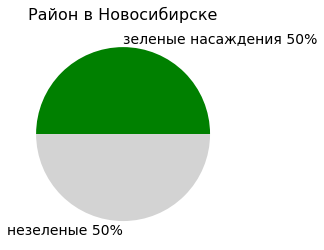

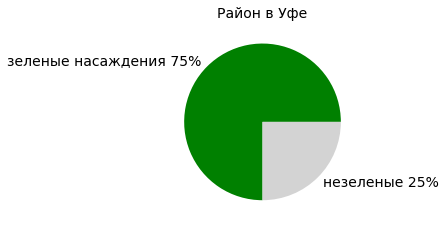

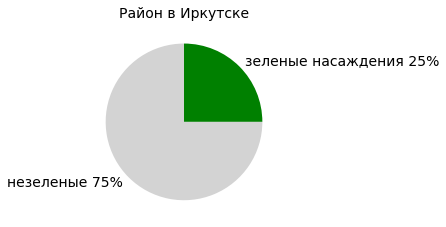

In [27]:
plt.rcParams['font.size'] = 14
# plt.figure(figsize=(10,10))
plt.title('Район в Новосибирске', fontsize = 16)
plt.pie([50,50], labels=['зеленые насаждения 50%', 'незеленые 50%'],colors=['green', 'lightgrey'])

plt.show()
plt.title('Район в Уфе', fontsize = 14)
plt.pie([75,25], labels=['зеленые насаждения 75%', 'незеленые 25%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()
plt.title('Район в Иркутске', fontsize = 14)
plt.pie([25,75], labels=['зеленые насаждения 25%', 'незеленые 75%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()

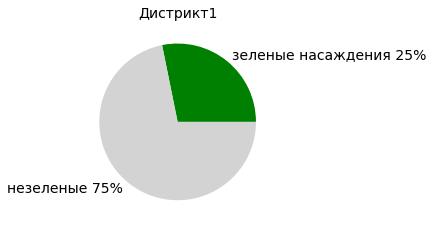

In [28]:
plt.title('Дистрикт1', fontsize = 14)
plt.pie([28.18,100-28.18], labels=['зеленые насаждения 25%', 'незеленые 75%'],colors=['green', 'lightgrey'])
plt.gcf().autofmt_xdate()
plt.show()